<a href="https://colab.research.google.com/github/DelMashiry-dev/DelMashiry-dev/blob/main/Realtime_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New section

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Medical_Resource_Prediction

owid-covid-data.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv', nrows=100)
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05            0          0   
1      AFG      Asia  Afghanistan  2020-01-06            0          0   
2      AFG      Asia  Afghanistan  2020-01-07            0          0   
3      AFG      Asia  Afghanistan  2020-01-08            0          0   
4      AFG      Asia  Afghanistan  2020-01-09            0          0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN             0           0                  NaN  ...   
1                 NaN             0           0                  NaN  ...   
2                 NaN             0           0                  NaN  ...   
3                 NaN             0           0                  NaN  ...   
4                 NaN             0           0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
!pip install pandas numpy matplotlib seaborn tensorflow torch pytorch-forecasting streamlit plotly scikit-learn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Perform Exploratory Data Analysis (EDA)



Missing Values (%):
location              0.000000
date                  0.000000
new_cases             0.000000
reproduction_rate    13.269231
icu_patients          0.000000
hosp_patients         0.000000
stringency_index     13.461538
population            0.000000
dtype: float64


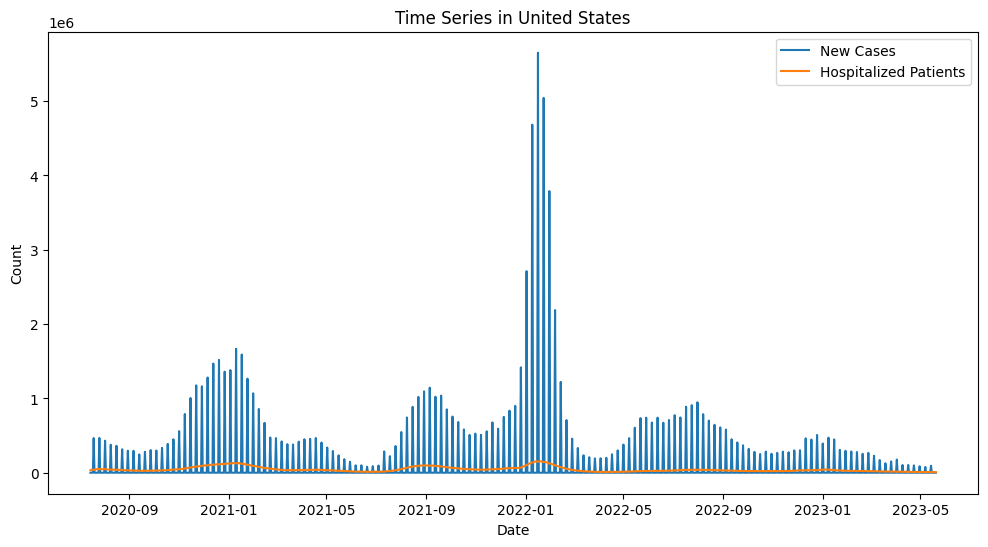

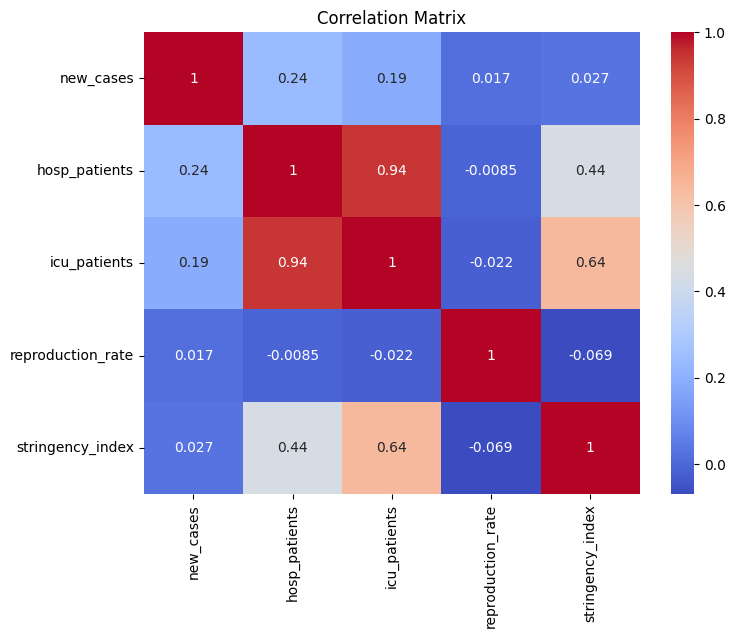

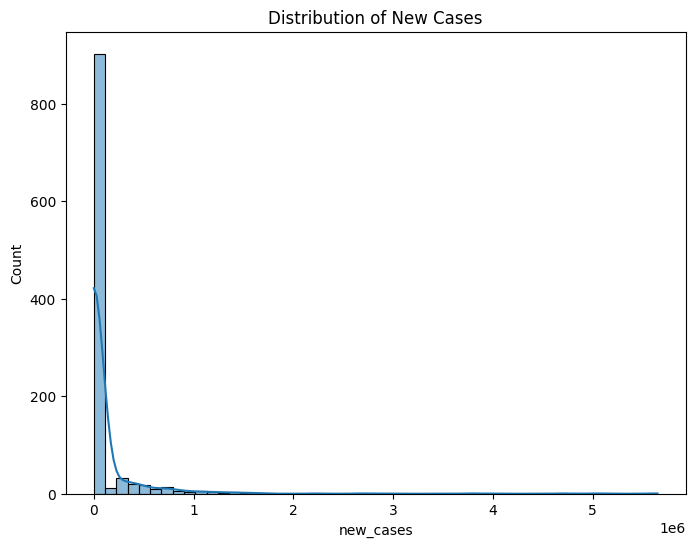

EDA completed. Preprocessed data saved.


<ipython-input-10-5f0caa724baa>:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['hosp_patients'] = df['hosp_patients'].fillna(method='ffill').interpolate()
<ipython-input-10-5f0caa724baa>:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['icu_patients'] = df['icu_patients'].fillna(method='ffill').interpolate()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data in chunks
chunks = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/owid-covid-data.csv',
                     chunksize=10000,
                     usecols=['date', 'location', 'new_cases', 'hosp_patients',
                              'icu_patients', 'reproduction_rate', 'stringency_index', 'population'])
df = pd.concat(chunks, ignore_index=True)
df['date'] = pd.to_datetime(df['date'])

# Filter for United States
df = df[df['location'] == 'United States'].dropna(subset=['new_cases', 'hosp_patients'])

# Missing Values
print("Missing Values (%):")
print(df.isnull().mean() * 100)

# Temporal Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='New Cases')
plt.plot(df['date'], df['hosp_patients'], label='Hospitalized Patients')
plt.title("Time Series in United States")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

# Correlation Analysis
corr_cols = ['new_cases', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['new_cases'].dropna(), bins=50, kde=True)
plt.title("Distribution of New Cases")
plt.show()

# Preprocess targets
df['hosp_patients'] = df['hosp_patients'].fillna(method='ffill').interpolate()
df['icu_patients'] = df['icu_patients'].fillna(method='ffill').interpolate()
df['hosp_patients_per_100k'] = df['hosp_patients'] / df['population'] * 100000
df['icu_patients_per_100k'] = df['icu_patients'] / df['population'] * 100000
df.to_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data.csv', index=False)

print("EDA completed. Preprocessed data saved.")

# Train and Compare LSTM and TFT Models



In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
import pytorch_lightning as pl

# Load preprocessed data
df = pd.read_csv('/content/drive/MyDrive/Medical_Resource_Prediction/preprocessed_data.csv')
df['date'] = pd.to_datetime(df['date'])

# Features and target
features = ['new_cases', 'reproduction_rate', 'stringency_index']
target = 'hosp_patients'

# Create lagged features
df['new_cases_lag7'] = df['new_cases'].shift(7)
features += ['new_cases_lag7']
df = df.dropna()

# Scale features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Prepare sequences
def create_sequences(data, seq_length=14):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i + seq_length].values)
        y.append(data[target].iloc[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM Model
lstm_model = Sequential([
    Input(shape=(14, len(features))),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(16),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16,
               callbacks=[early_stopping], verbose=1)
y_pred_lstm = lstm_model.predict(X_test)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))  # Fixed RMSE
r2_lstm = r2_score(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100
print(f"LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R²: {r2_lstm:.2f}, MAPE: {mape_lstm:.2f}%")

# Save LSTM model
lstm_model.save('/content/drive/MyDrive/Medical_Resource_Prediction/lstm_model.h5')

# TFT Model
df['time_idx'] = range(len(df))
training = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="hosp_patients",
    group_ids=["location"],
    min_encoder_length=14,
    max_encoder_length=14,
    max_prediction_length=7,
    time_varying_known_reals=features,
    time_varying_unknown_reals=["hosp_patients"]
)
train_dataloader = training.to_dataloader(train=True, batch_size=16)
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16)
trainer = pl.Trainer(max_epochs=20, accelerator='gpu', devices=1)
trainer.fit(tft, train_dataloaders=train_dataloader)
y_pred_tft = tft.predict(training.filter(lambda x: x.time_idx >= len(df) - len(X_test)))
mae_tft = mean_absolute_error(y_test[:len(y_pred_tft)], y_pred_tft)
rmse_tft = np.sqrt(mean_squared_error(y_test[:len(y_pred_tft)], y_pred_tft))  # Fixed RMSE
r2_tft = r2_score(y_test[:len(y_pred_tft)], y_pred_tft)
mape_tft = np.mean(np.abs((y_test[:len(y_pred_tft)] - y_pred_tft) / y_test[:len(y_pred_tft)])) * 100
print(f"TFT - MAE: {mae_tft:.2f}, RMSE: {rmse_tft:.2f}, R²: {r2_tft:.2f}, MAPE: {mape_tft:.2f}%")

# Save TFT model
tft.save('/content/drive/MyDrive/Medical_Resource_Prediction/tft_model.pt')

# Flu Scenario
flu_df = df.copy()
flu_df['reproduction_rate'] = np.clip(flu_df['reproduction_rate'] * 0.5, 1.2, 1.5)
flu_df['hosp_patients'] = flu_df['new_cases'] * 0.1
flu_df['new_cases_lag7'] = flu_df['new_cases'].shift(7)
flu_df = flu_df.dropna()
flu_dataset = TimeSeriesDataSet(
    flu_df,
    time_idx="time_idx",
    target="hosp_patients",
    group_ids=["location"],
    min_encoder_length=14,
    max_encoder_length=14,
    max_prediction_length=7,
    time_varying_known_reals=features,
    time_varying_unknown_reals=["hosp_patients"]
)
y_pred_flu = tft.predict(flu_dataset)
y_flu = flu_df['hosp_patients'].iloc[14:14+len(y_pred_flu)].values
mae_flu = mean_absolute_error(y_flu, y_pred_flu)
rmse_flu = np.sqrt(mean_squared_error(y_flu, y_pred_flu))  # Fixed RMSE
r2_flu = r2_score(y_flu, y_pred_flu)
mape_flu = np.mean(np.abs((y_flu - y_pred_flu) / y_flu)) * 100
print(f"Flu Scenario - MAE: {mae_flu:.2f}, RMSE: {rmse_flu:.2f}, R²: {r2_flu:.2f}, MAPE: {mape_flu:.2f}%")

# Save metrics
with open('/content/drive/MyDrive/Medical_Resource_Prediction/model_metrics.txt', 'w') as f:
    f.write(f"LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R²: {r2_lstm:.2f}, MAPE: {mape_lstm:.2f}%\n")
    f.write(f"TFT - MAE: {mae_tft:.2f}, RMSE: {rmse_tft:.2f}, R²: {r2_tft:.2f}, MAPE: {mape_tft:.2f}%\n")
    f.write(f"Flu Scenario - MAE: {mae_flu:.2f}, RMSE: {rmse_flu:.2f}, R²: {r2_flu:.2f}, MAPE: {mape_flu:.2f}%\n")

<ipython-input-13-e9e00bee1cc3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features] = scaler.fit_transform(df[features])


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 4922673152.0000 - val_loss: 581199424.0000
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4774836224.0000 - val_loss: 581146880.0000
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4977447424.0000 - val_loss: 581096448.0000
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5237946880.0000 - val_loss: 581043456.0000
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4818117120.0000 - val_loss: 580985792.0000
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4560876032.0000 - val_loss: 580921472.0000
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5013605376.0000 - val_loss: 580850304.0000
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4868140544.0000 - val_loss: 580770432.0000
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5105236992.0000 - val_loss: 580681792.0000
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4767068672.0000 - val_

LSTM - MAE: 29696.15, RMSE: 30418.81, R²: -20.30, MAPE: 100.00%


/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


MisconfigurationException: No supported gpu backend found!

In [12]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))